# Tarea 3: Gráficas


## Gráfica de datos

In [5]:
#Ejercicio 1: Manchas solares
meses = []
manchas_solares = []

with open('manchasolares.txt', 'r') as file:
    for line in file:
        mes, manchas = map(float, line.split())
        meses.append(mes)
        manchas_solares.append(manchas)

In [2]:
#a) gráfica de los datos disponibles
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(meses, manchas_solares)
plt.title('Manchas Solares en Función del Tiempo')
plt.xlabel('Meses desde enero de 1749')
plt.ylabel('Número de Manchas Solares')
plt.grid(True)
plt.show()

NameError: name 'meses' is not defined

<Figure size 1200x600 with 0 Axes>

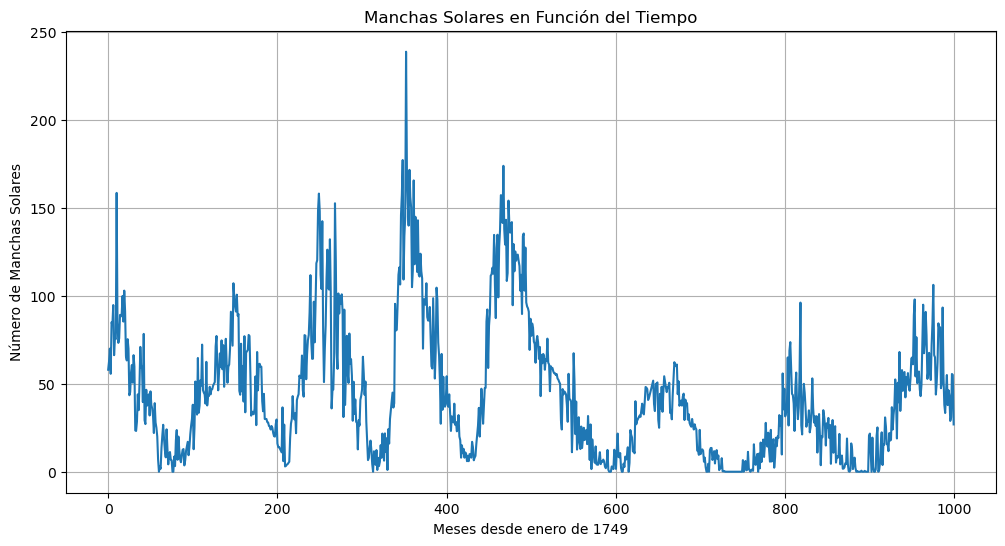

In [3]:
#b) Solo los primeros 1000 datos
plt.figure(figsize=(12, 6))
plt.plot(meses[0:1000], manchas_solares[0:1000])
plt.title('Manchas Solares en Función del Tiempo')
plt.xlabel('Meses desde enero de 1749')
plt.ylabel('Número de Manchas Solares')
plt.grid(True)
plt.show()

In [4]:
#c) Calcular la media móvil con r=5
r = 5
media_movil = []

for k in range(1000):
    suma = 0
    for m in range(-r, r + 1):
        if k + m >= 0 and k + m < 1000:
            suma += manchas_solares[k + m]
    media_movil.append(suma/(2 * r))

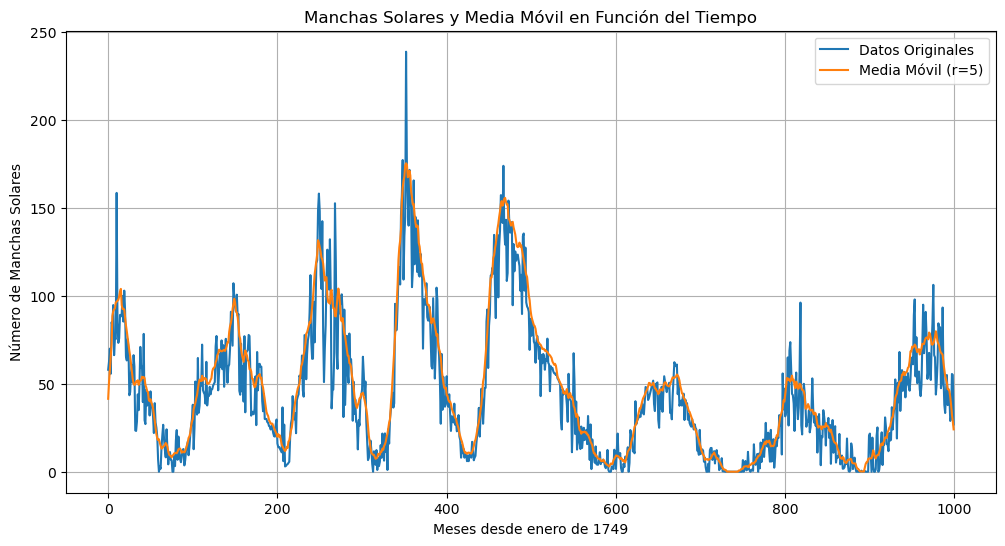

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(meses[0:1000], manchas_solares[:1000], label='Datos Originales')
plt.plot(meses[0:1000], media_movil, label='Media Móvil (r=5)')
plt.title('Manchas Solares y Media Móvil en Función del Tiempo')
plt.xlabel('Meses desde enero de 1749')
plt.ylabel('Número de Manchas Solares')
plt.grid(True)
plt.legend()
plt.show()

## Ejercicio 2: Gráfica de Curvas.

In [7]:
#a) Curva deltoide
# Definir valores de t en el rango de 0 a 2*pi
import numpy as np
t = np.linspace(0, 2 * np.pi, 1000)

# Calcular las coordenadas x(t) e y(t) utilizando las ecuaciones paramétricas
x = 2 * np.cos(t) + np.cos(2 * t)
y = 2 * np.sin(t) - np.sin(2 * t)

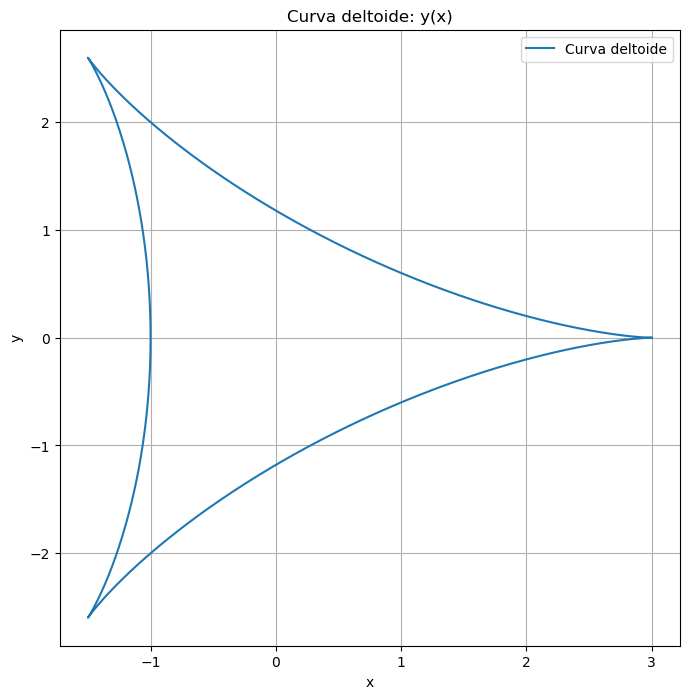

In [7]:
# Crear la gráfica de y en función de x
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Curva deltoide')
plt.title('Curva deltoide: y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
#b) Gráfica polar
# Definir valores de θ en el rango de 0 a 10π
theta = np.linspace(0, 10 * np.pi, 1000)

# Calcular r(t) = t² para los valores de θ
r = theta**2

# Convertir coordenadas polares (r, θ) a coordenadas cartesianas (x, y)
x = r * np.cos(theta)
y = r * np.sin(theta)

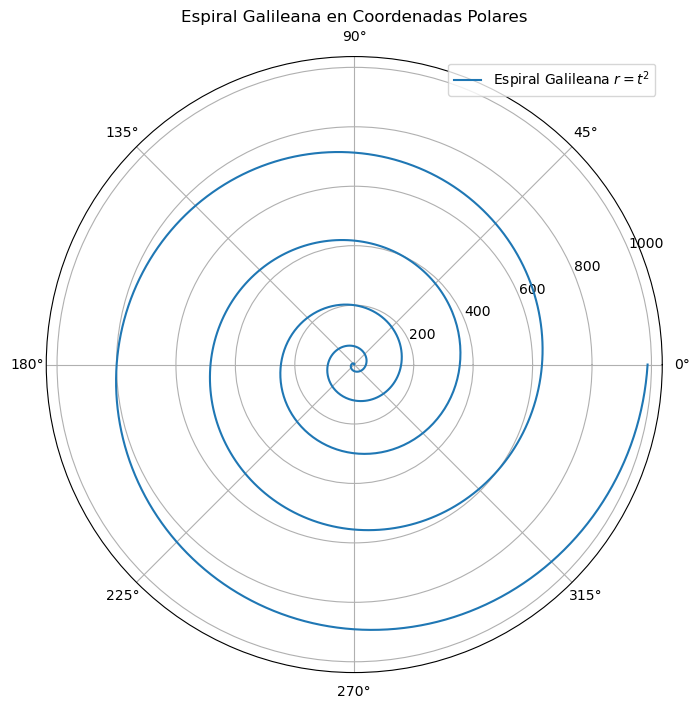

In [9]:
# Crear la gráfica polar de r = t²
plt.figure(figsize=(8, 8))
plt.polar(theta, r, label='Espiral Galileana $r = t^2$')
plt.title('Espiral Galileana en Coordenadas Polares')
plt.grid(True)
plt.legend()
plt.show()

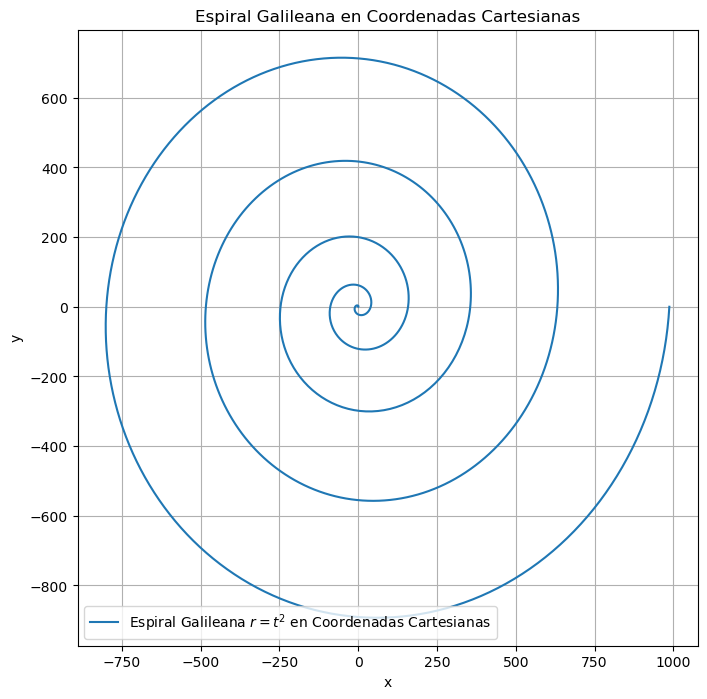

In [10]:
# Crear la gráfica en coordenadas cartesianas
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Espiral Galileana $r = t^2$ en Coordenadas Cartesianas')
plt.title('Espiral Galileana en Coordenadas Cartesianas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
#c)Función de Frey
theta = np.linspace(0, 24 * np.pi, 1000)

# Calcular r(θ) = 1 / (θ + sin(θ))
r = np.exp(np.cos(theta)) - 2*np.cos(4*theta) + np.sin(theta/12)**5

# Convertir coordenadas polares (r, θ) a coordenadas cartesianas (x, y)
x = r * np.cos(theta)
y = r * np.sin(theta)

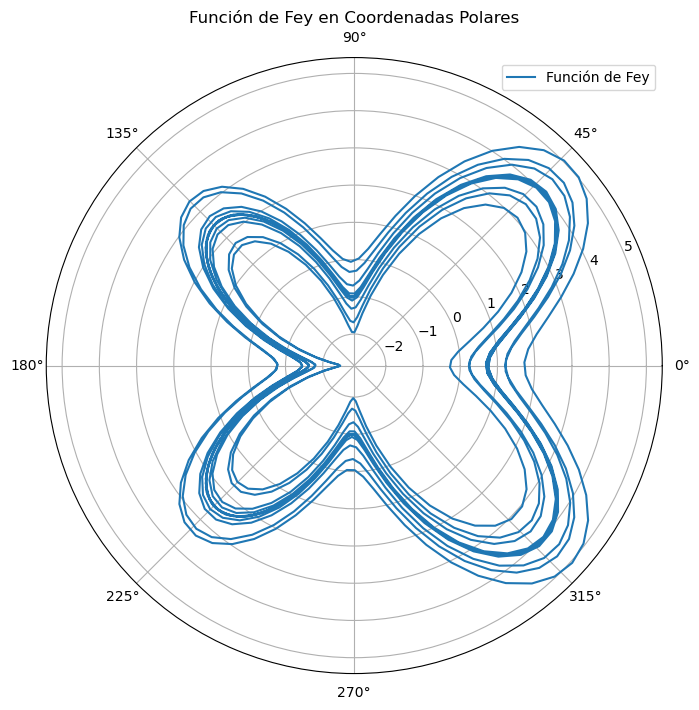

In [12]:
# Crear la gráfica polar de la "función de Fey"
plt.figure(figsize=(8, 8))
plt.polar(theta, r, label='Función de Fey')
plt.title('Función de Fey en Coordenadas Polares')
plt.grid(True)
plt.legend()
plt.show()

# Ejercicio 3: Caminata Aleatoria

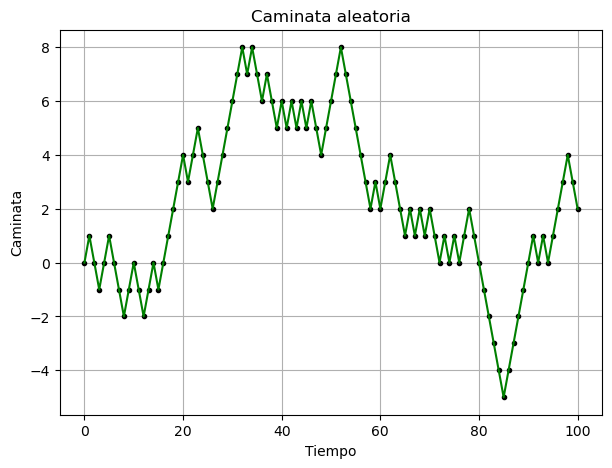

In [7]:
#Camminata aleatoria
def caminataA(N,p):
    caminata = [0]
    sum = 0
    for i in range(N):
        if np.random.rand() > p:
            sum += 1
            caminata.append(sum)
        else:
            sum -= 1
            caminata.append(sum)
    return caminata
N = 100
p = 0.5
caminata = caminataA(N,p)
plt.figure(figsize=(7,5))
plt.xlabel("Tiempo")
plt.ylabel("Caminata")
plt.title("Caminata aleatoria")
plt.plot(range(N+1),caminata,'k.')
plt.plot(range(N+1),caminata,'g-')
plt.grid(True)
plt.show()

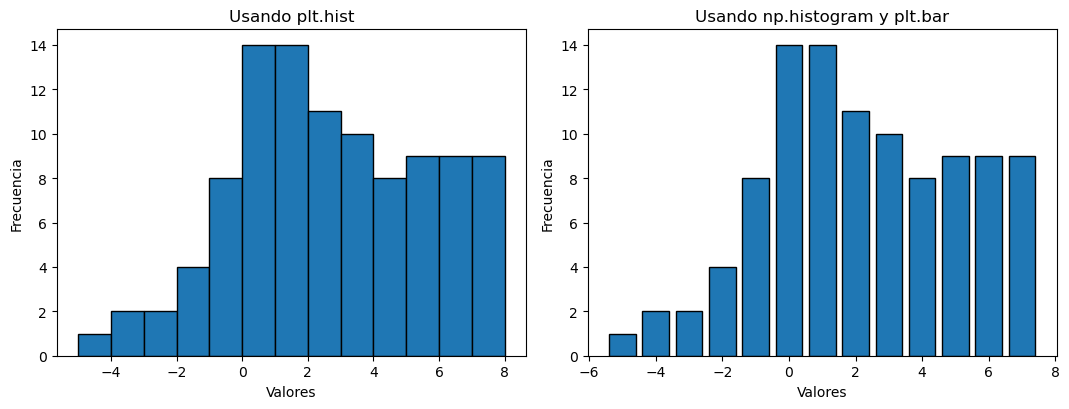

In [8]:
#plt.stairs(count,bins)
#plt.hist(bins[:-1], bins, weights=counts)
counts, bins = np.histogram(caminata,bins = range(min(caminata),max(caminata)+1))

h = 0.6 #parametro para jugar con el tamaño de la imagen
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (18*h,7*h)) 

ax1.hist(caminata,edgecolor='black',bins = range(min(caminata),max(caminata)+1))
ax1.set_title("Usando plt.hist")
ax1.set_xlabel("Valores")
ax1.set_ylabel("Frecuencia")
ax2.bar(bins[:-1], counts,edgecolor='black')
ax2.set_title("Usando np.histogram y plt.bar")
ax2.set_xlabel("Valores")
ax2.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [9]:
#b)100 caminatas aleatorias
caminatas = []
p = 0.5
N = 100
for i in range(100):
    caminata = caminataA(N,p)
    caminatas.append(caminata)



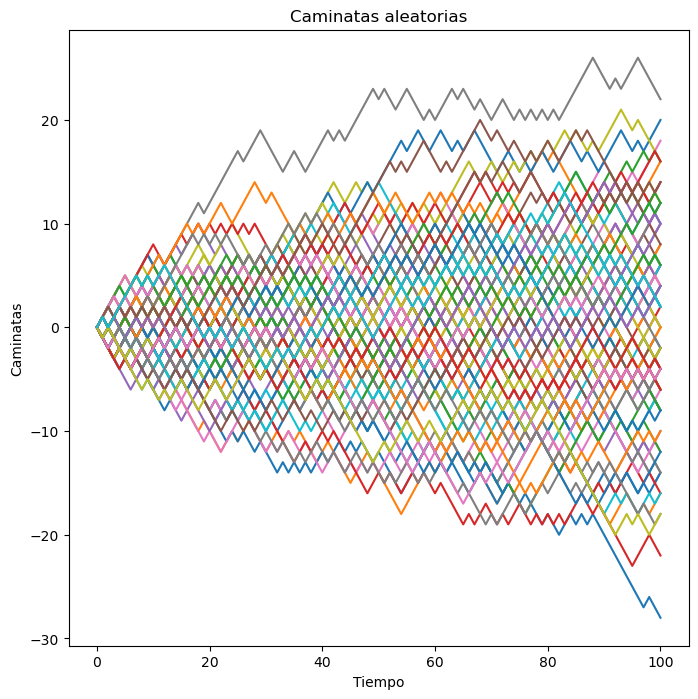

In [10]:
plt.figure(figsize=(8,8))
plt.xlabel("Tiempo")
plt.ylabel("Caminatas")
plt.title("Caminatas aleatorias")
for i in range(len(caminatas)):
    plt.plot(caminatas[i])
plt.show()

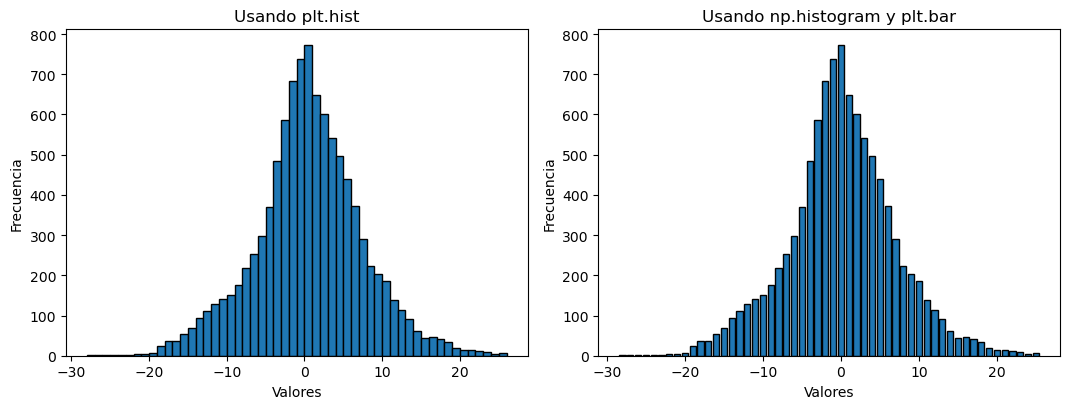

In [11]:
data = caminatas  # Tu lista de 100 listas
data = [item for sublist in data for item in sublist]
y,x = np.histogram(data,bins=range(min(data),max(data)+1))

h = 0.6 #parametro para jugar con el tamaño de la imagen
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (18*h,7*h))  

ax1.hist(data,bins=range(min(data),max(data)+1),edgecolor='black')
ax1.set_title("Usando plt.hist")
ax1.set_xlabel("Valores")
ax1.set_ylabel("Frecuencia")
ax2.bar(x[:-1], y, edgecolor='black')
ax2.set_title("Usando np.histogram y plt.bar")
ax2.set_xlabel("Valores")
ax2.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [33]:
#c)Caminatas aleatorias en 2D y 3D
def caminataND(N :int,p :float,dim :int):
    X = []
    for i in range(dim):
        X.append(caminataA(N,p))
    
    return X
X=caminataND(500,.5,2)
Y=caminataND(500,.5,3)

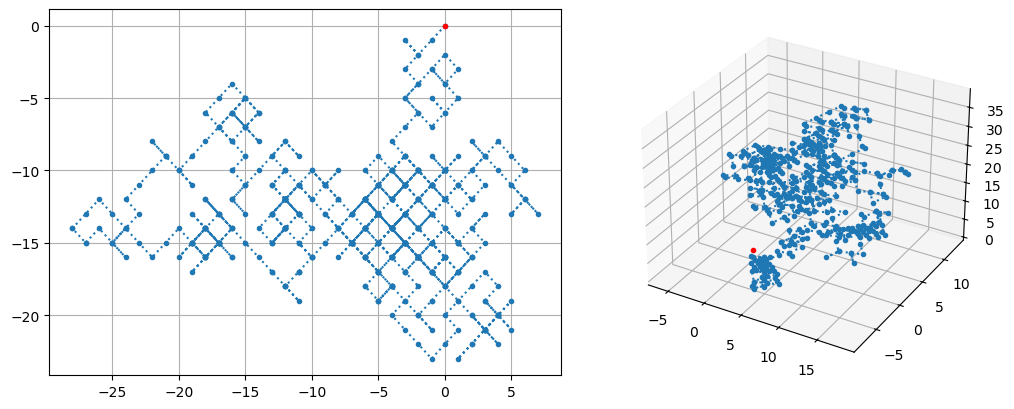

In [70]:
#Para una caminata
from mpl_toolkits.mplot3d import Axes3D

X=caminataND(500,.5,2)
Y=caminataND(500,.5,3)

h = 0.6 #parametro para jugar con el tamaño de la imagen
fig = plt.figure(figsize = (18*h,7*h)) 

ax1 = fig.add_subplot(121)  # 1 fila, 2 columnas, 1er subplot
ax1.plot(X[0],X[1],'.:')
ax1.plot(X[0][0],X[1][0],'r.')
# ax1.set_xlim(-30,30)
# ax1.set_ylim(-30,30)

ax2 = fig.add_subplot(122, projection='3d')  # 1 fila, 2 columnas, 2do subplot
ax2.plot(Y[0],Y[1],Y[2],'.:')
ax2.plot(Y[0][0],Y[1][0],Y[2][2],'r.')
# ax2.set_xlim(-30,30)
# ax2.set_ylim(-30,30)

ax1.grid()
# ax1.set_xticks(range(-30,30,2))
# ax1.set_yticks(range(-30,30,2))

# Mostrar la figura con ambos subplots
plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

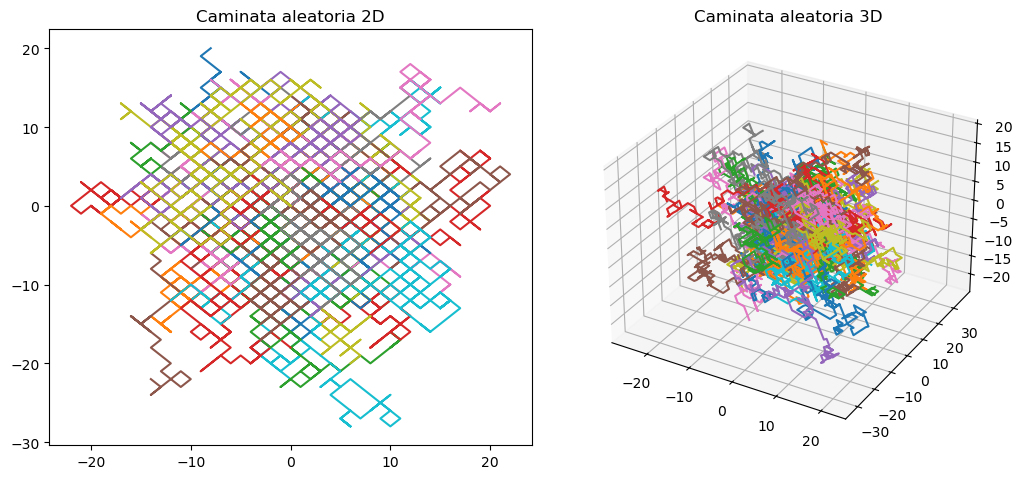

In [20]:
caminatas2D = []
caminatas3D = []
p = 0.5
N = 100
for i in range(1,100):
    caminata = caminataND(N,p,2)
    caminatas2D.append(caminata)

for i in range(1,100):
    caminata = caminataND(N,p,3)
    caminatas3D.append(caminata)

h = 0.7
fig = plt.figure(figsize = (15*h,7*h)) 
ax1 = fig.add_subplot(121)

for i in range(len(caminatas2D)):
    ax1.plot(caminatas2D[i][0],caminatas2D[i][1])
ax1.set_title("Caminata aleatoria 2D")

ax2 = fig.add_subplot(122, projection='3d')

for i in range(len(caminatas3D)):
    ax2.plot(caminatas3D[i][0],caminatas3D[i][1],caminatas3D[i][2])
ax2.set_title("Caminata aleatoria 3D")
plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

# Ecuación logística: Series de tiempo y mapeos. 

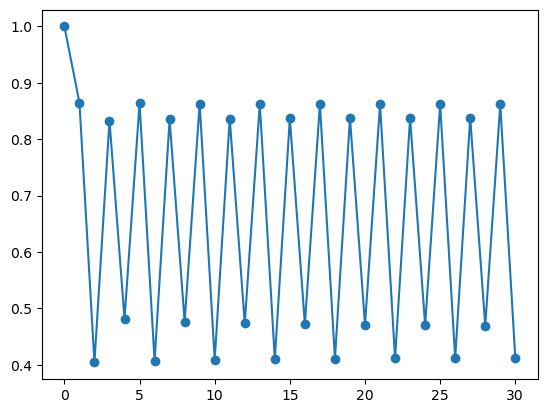

In [5]:
#a)Series de tiempo

def Logistico(r,x):
    return r*x*(1-x)

r=3.46
sol = [1]
it=0.5
for i in range(30):
    it = Logistico(r,it)
    sol.append(it)
plt.plot(sol,'o-')

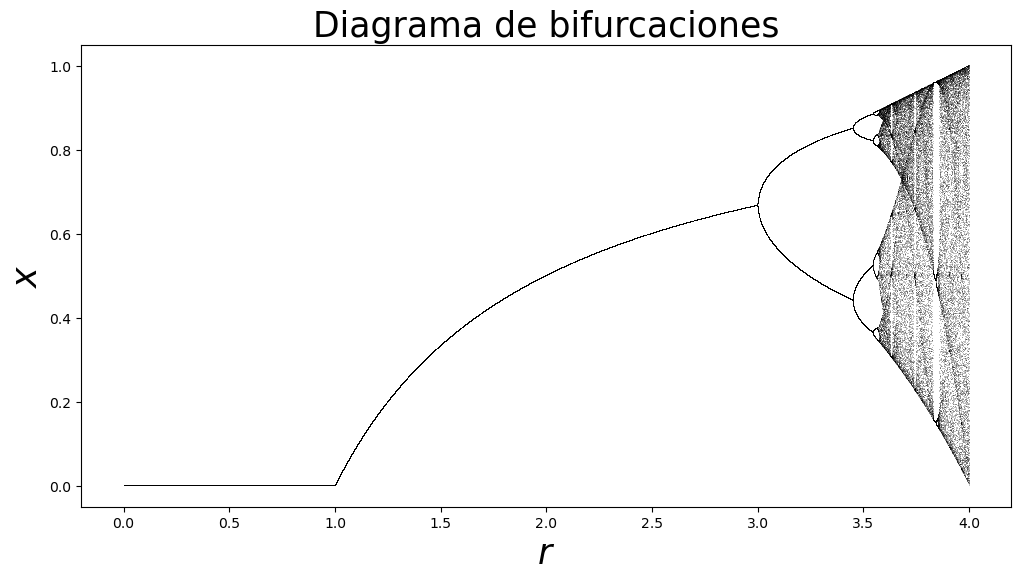

In [11]:
#b) y c)Mapeo logístico
def diagramasBifurcaciones(f,x0):
    r = np.arange(0,4,0.0001)
    iters = 1000
    last = 10
    x = x0
    for i in range(iters+last):
        x = f(r,x)
        if i >= iters:
            plt.plot(r, x, ',k', alpha=0.25)  # alphaSet transparencia
    plt.title("Diagrama de bifurcaciones",size=25)
    plt.xlabel("$r$",size=25)
    plt.ylabel("$x$",size=25)
    #plt.plot(2,1,'go',label="$r=2$, $x=1$")
    #plt.legend()
    #plt.savefig("mapeo1")
    plt.show()

plt.figure(figsize=[12,6])
diagramasBifurcaciones(Logistico,0.6)

# Conjunto de mandelbrot

In [12]:
# Tamaño de la cuadrícula
N = 800

# Rango de valores para x e y
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0

# Crear una cuadrícula de valores complejos en el rango dado
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x, y)
c_values = X + 1j * Y

In [13]:
# Inicializar la matriz de salida con ceros (todos los puntos fuera del conjunto)
mandelbrot = np.zeros_like(c_values, dtype=np.uint8)

# Número máximo de iteraciones
max_iterations = 100

# Iterar para cada punto c
z = np.zeros_like(c_values)
for i in range(max_iterations):
    z = z**2 + c_values
    # Verificar si los puntos han escapado
    mask = np.abs(z) < 2.0
    mandelbrot += mask

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_17680\3161144947.py:10: RuntimeWarning: overflow encountered in square
  z = z**2 + c_values
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_17680\3161144947.py:10: RuntimeWarning: invalid value encountered in square
  z = z**2 + c_values


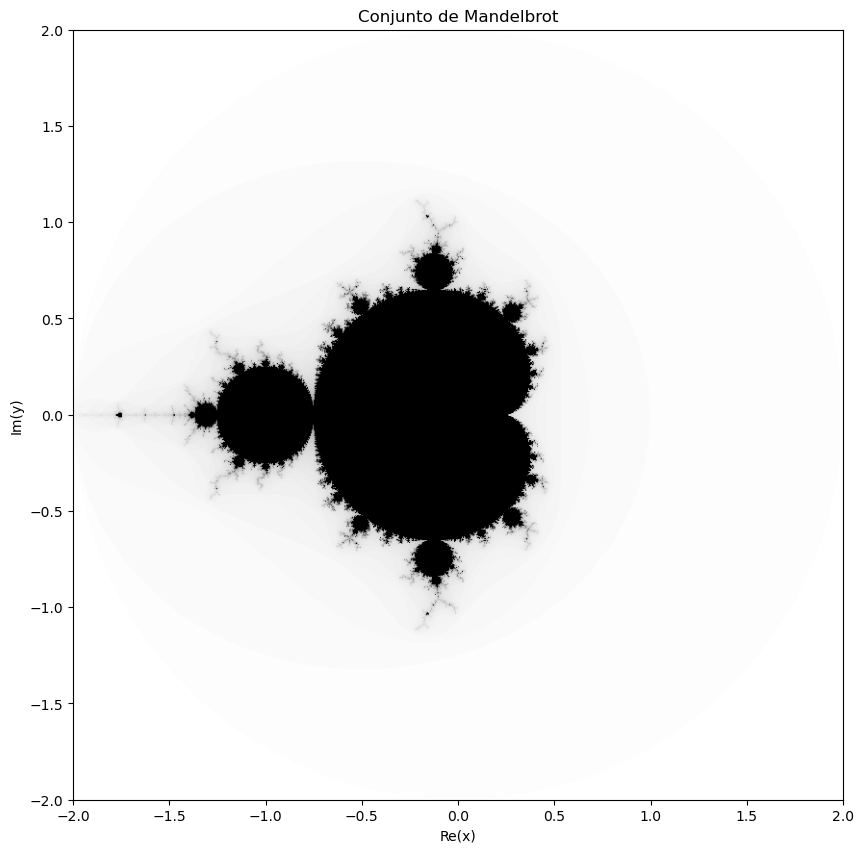

In [14]:
# Crear la imagen de densidad (density plot)
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot, extent=(x_min, x_max, y_min, y_max), cmap='binary', origin='lower')
plt.title('Conjunto de Mandelbrot')
plt.xlabel('Re(x)')
plt.ylabel('Im(y)')
plt.show()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_25796\523568158.py:26: RuntimeWarning: overflow encountered in square
  z = z**2 + c_values
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_25796\523568158.py:26: RuntimeWarning: invalid value encountered in square
  z = z**2 + c_values


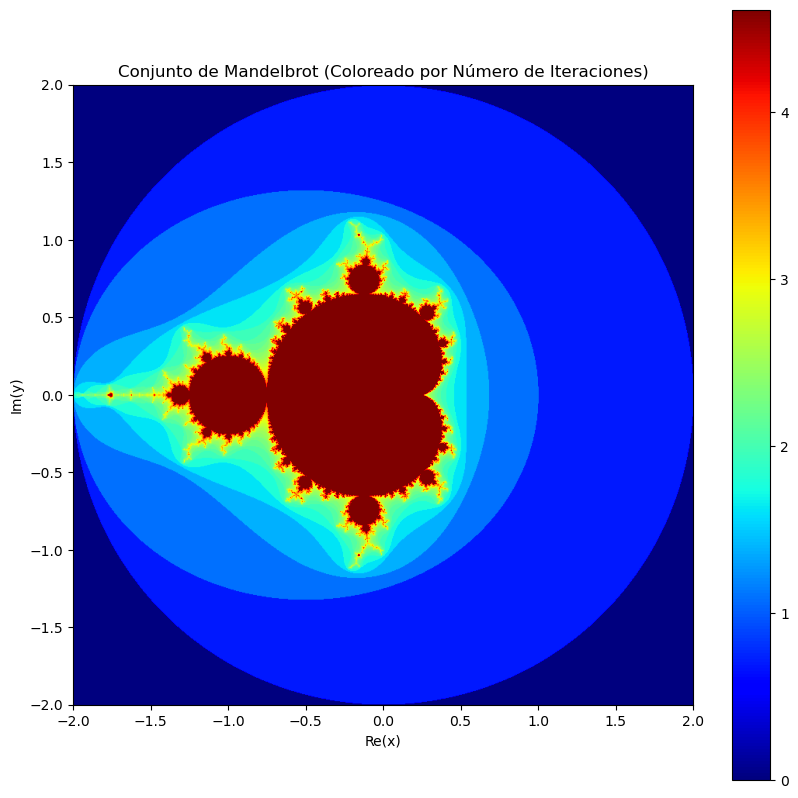

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Tamaño de la cuadrícula
N = 800

# Rango de valores para x e y
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0

# Crear una cuadrícula de valores complejos en el rango dado
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x, y)
c_values = X + 1j * Y

# Inicializar la matriz de salida con ceros (todos los puntos fuera del conjunto)
mandelbrot = np.zeros_like(c_values, dtype=np.uint8)

# Número máximo de iteraciones
max_iterations = 100

# Iterar para cada punto c y registrar el número de iteraciones
z = np.zeros_like(c_values)
for i in range(max_iterations):
    z = z**2 + c_values
    # Verificar si los puntos han escapado
    mask = np.abs(z) < 2.0
    mandelbrot += mask

# Colorear los puntos según el número de iteraciones (utilizando el esquema "jet")
plt.figure(figsize=(10, 10))
plt.imshow(np.log(mandelbrot + 1), extent=(x_min, x_max, y_min, y_max), cmap='jet', origin='lower')
plt.title('Conjunto de Mandelbrot (Coloreado por Número de Iteraciones)')
plt.xlabel('Re(x)')
plt.ylabel('Im(y)')
plt.colorbar()
plt.show()
